# Multiple Linear Regression

## Bike Sharing Case Study

### Problem statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the Corona pandemic.
Company wants to understand the factors affecting the demand for these shared bikes in the American market. 
The service provider firm has gathered a large dataset on daily bike demand based on various meteorological surveys and people's styles, to find which variables is significant in predicting the demand for shared bikes across the American market. 

### Business Goal:
To model the demand for shared bikes with the available independent variables, which will be used by the management to understand how exactly the demands vary with different features. This helps in manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Bshar= pd.read_csv("day.csv")
Bshar.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
Bshar.shape

(730, 16)

In [4]:
Bshar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


####  We have about 16 columns with 730 non-null records in this dataset

### Removing the Non required columms

__instant__ - We already have the index column in dataframe, this is the unique column and not used for any of the analysis.

__dteday__ - This is the unique column which represents particular day of month of year. we have separate month and year column, 
             so this is not needed for any analysis
             
__casual  & registered__ - we have separate column __cnt__ for total number of bikes used per day.


In [5]:
Bshar.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [6]:
Bshar.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Changing the Numerical value of the column as per Data dictionary 

 - changing the values of the season column from numerical to categorical

In [7]:
Bshar.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
def seasons(x):
    if x == 1:
        return "Spring"
    elif x == 2:
        return "Summer"
    elif x ==3:
        return "Fall"
    elif x == 4:
        return "Winter"
Bshar.season = Bshar.season.apply(seasons)
Bshar.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

- changing the values of the weathersit column from numerical to categorical

In [9]:
Bshar.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [10]:
def weathersits(x):
    if x == 1:
        return "Clear"
    if x == 2:
        return "Mist"
    if x == 3:
        return "Light Snow"
    if x == 4:
        return "Heavy Rain"
Bshar.weathersit = Bshar.weathersit.apply(weathersits)
Bshar.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

- It is clearly states that this __Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog__ weather is not happened for the 2018 & 2019

#### Changing the Month for easy understanding

In [11]:
Bshar.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [12]:
Bshar.mnth = Bshar.mnth.map({1:'January',
                         2:'February',
                         3:'March',
                         4:'April',
                         5:'May',
                         6:'June',
                         7:'July',
                         8:'August',
                         9:'September',
                         10:'October',
                         11:'November',
                         12:'December'})
Bshar.mnth.value_counts()

May          62
December     62
January      62
October      62
July         62
March        62
August       62
November     60
April        60
September    60
June         60
February     56
Name: mnth, dtype: int64

#### Changing the Weekdays for easy understanding

In [13]:
Bshar.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [14]:
Bshar.weekday = Bshar.weekday.map({0:'Sunday',
                               1:'Monday',
                               2:'Tuesday',
                               3:'Wednesday',
                               4:'Thursday',
                               5:'Friday',
                               6:'Saturday'})
Bshar.weekday.value_counts()

Monday       105
Saturday     105
Sunday       105
Tuesday      104
Friday       104
Thursday     104
Wednesday    103
Name: weekday, dtype: int64

# Visualizing the data

In [15]:
Bshar.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### __Cnt__ is the target variable for our analysis

## Relation between numerical variables

In [16]:
Bshar[['temp','atemp','hum','windspeed','cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


### Heat map

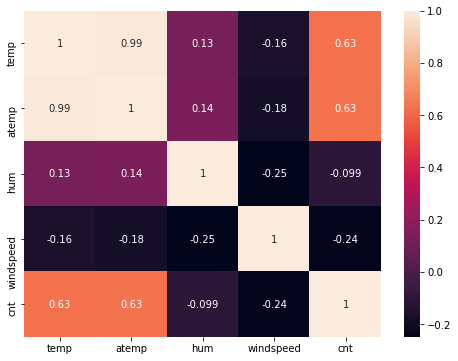

In [17]:
plt.figure(figsize = (8,6))
sns.heatmap(Bshar[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True);

### Pair plot visulaisation

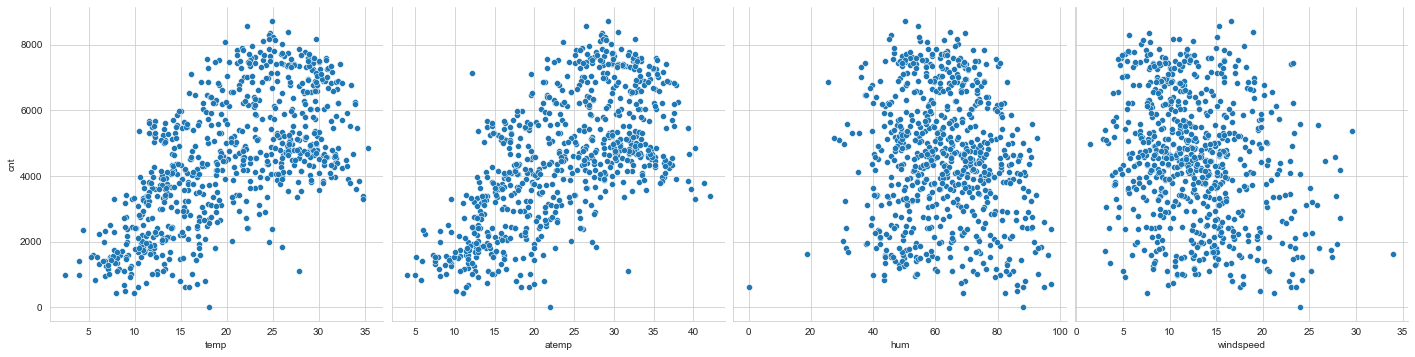

In [18]:
sns.set_style('whitegrid')
sns.pairplot(Bshar,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',height=5,aspect=1);

 Observations:
-  With 'temp' and 'atemp' there seems to be an increasing trend with 'cnt' forms almost a linear graph
- 'temp' and 'atemp' looks quite similar. 
- 'hum' vs 'cnt' has one lower bound outlier
- 'Windspeed' vs 'cnt' has some upper bound outlier


### Dropping the __atemp__ from the dataset
- The __temp__ and __atemp__ are highly co-related and the from the dictionary it is stated as that the 'atemp' is feeling of __temp__ . Using the variable with high co-relation will leads to multi-collinearity which affects the model. For Business perspective the __atemp__ will not used much so dropping it.

In [19]:
Bshar.drop(['atemp'],axis=1,inplace=True)

In [20]:
Bshar.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


### Outlier treatment

#### Outliers are known to affect the model since even one outlier can significantly affect the slope of the linear regression line. So, it is best that the outliers should be treated.

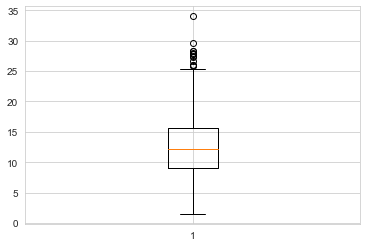

In [21]:
plt.boxplot(Bshar.windspeed)
plt.show()

#### From the plot it is seen that some of the outliers are present for the windspeed for the higher value. so treated the higher value with upperbound values

In [22]:
WQ1=Bshar['windspeed'].quantile(0.25)
WQ3=Bshar['windspeed'].quantile(0.75)
IQR=WQ3-WQ1
upper_bound=WQ3 + (1.5 * IQR)
print(upper_bound)

25.501498125


In [23]:
Bshar[(Bshar.windspeed>upper_bound)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
44,Spring,0,February,0,Monday,1,Clear,17.015000,37.5833,27.999836,1913
49,Spring,0,February,0,Saturday,0,Clear,16.365847,18.7917,34.000021,1635
93,Summer,0,April,0,Monday,1,Clear,23.506653,42.6250,25.833257,3115
94,Summer,0,April,0,Tuesday,1,Mist,16.980847,64.2083,26.000489,1795
292,Winter,0,October,0,Thursday,1,Clear,19.509153,63.6250,28.292425,4195
382,Spring,1,January,0,Wednesday,1,Clear,12.436653,44.3333,27.833743,3376
407,Spring,1,February,0,Sunday,0,Clear,5.227500,46.4583,27.417204,1529
420,Spring,1,February,0,Saturday,0,Clear,11.924153,39.5833,28.250014,2732
431,Spring,1,March,0,Thursday,1,Clear,21.627500,56.7500,29.584721,5382
432,Spring,1,March,0,Friday,1,Mist,16.844153,40.7083,27.791600,4569


In [24]:
Bshar['windspeed']=Bshar['windspeed'].apply(lambda x: x if x <= 25.501498125 else 25.501498125)

### Humidity

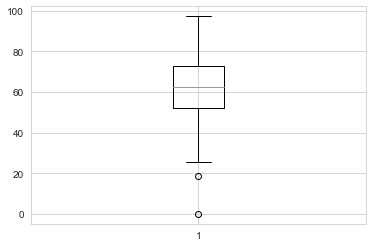

In [25]:
plt.boxplot(Bshar.hum)
plt.show()

#### From the plot it is seen that some of the outliers are present for the Humidity for the lowe value. so treated the lower value with lower bound values

In [26]:
HQ1=Bshar['hum'].quantile(0.25)
HQ3=Bshar['hum'].quantile(0.75)
IQR=HQ3-HQ1
lower_bound=HQ1 - (1.5 * IQR)
print(lower_bound)

20.515637499999997


In [27]:
Bshar[(Bshar.hum<lower_bound)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
49,Spring,0,February,0,Saturday,0,Clear,16.365847,18.7917,25.501498,1635
68,Spring,0,March,0,Thursday,1,Light Snow,15.952731,0.0000,17.545759,623


In [28]:
Bshar['hum']=Bshar['hum'].apply(lambda x: x if x >= 20.515637499999997 else 20.515637499999997)

### Plotting the categorical variables

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

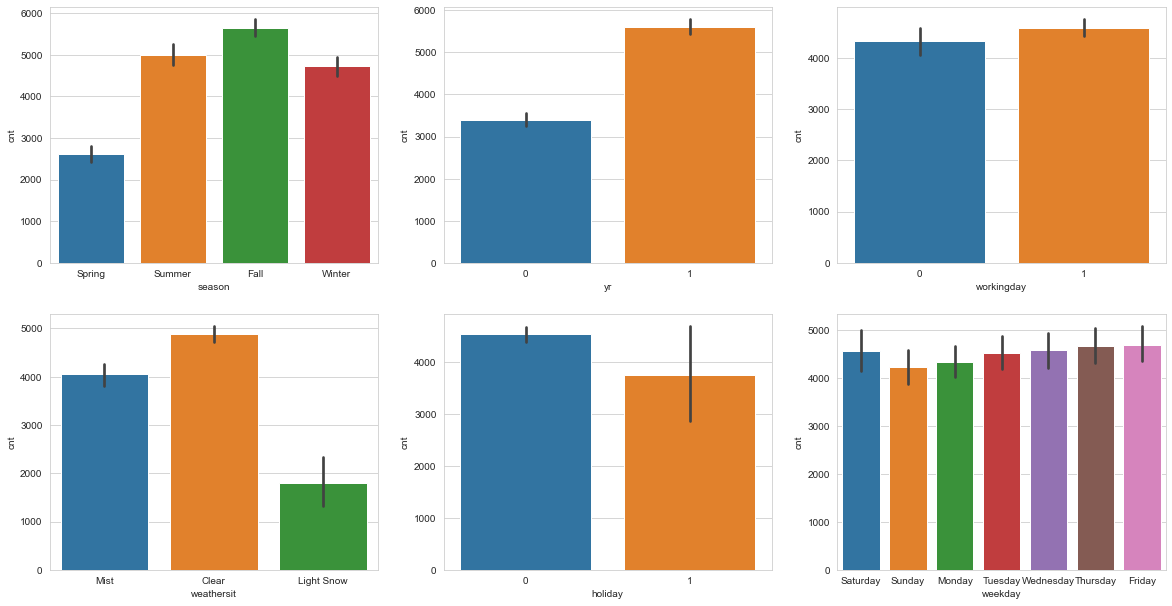

In [29]:
plt.figure(figsize=(20, 16))
plt.title("Bi-Variate Analysis of categorical independant variables \n")

plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'cnt', data = Bshar)

plt.subplot(3,3,2)
sns.barplot(x = 'yr', y = 'cnt', data = Bshar)

plt.subplot(3,3,3)
sns.barplot(x = 'workingday', y = 'cnt', data = Bshar)

plt.subplot(3,3,4)
sns.barplot(x = 'weathersit', y = 'cnt', data = Bshar)

plt.subplot(3,3,5)
sns.barplot(x = 'holiday', y = 'cnt', data = Bshar)

plt.subplot(3,3,6)
sns.barplot(x = 'weekday', y = 'cnt', data = Bshar)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

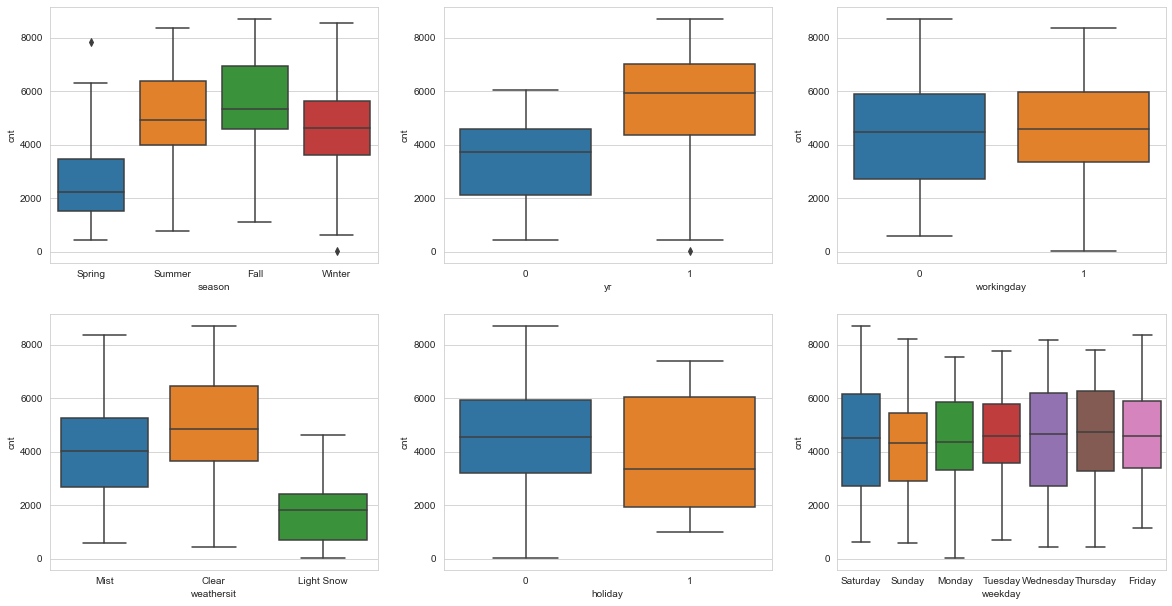

In [30]:
plt.figure(figsize=(20, 16))
plt.title("Bi-Variate Analysis of categorical independant variables \n")

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bshar)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bshar)

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bshar)

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bshar)

plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bshar)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bshar)


Observation

- 'Season' vs 'count' - most number of the bikes are taken during the fall season
- 'Yr' vs 'count' - most no of bike was taken out during the year 2019 - Maybe the company was started from 2018 and the graudual takeaway of bikes increases over the year. The median increases almost '2000' more than the previous year
-  'Weathersit vs 'count - Most no of bikes taken during the 'Clear' condition . The bike was rented less in 'Light Snow/Rainy' seaoson
- 'Holiday' vs 'count - Less number of bike was taken during holiday
- 'Working day' and 'Weekday' dosen't have any major impact on the count. Almost bike was taken in all weekday as well as working & non- working day

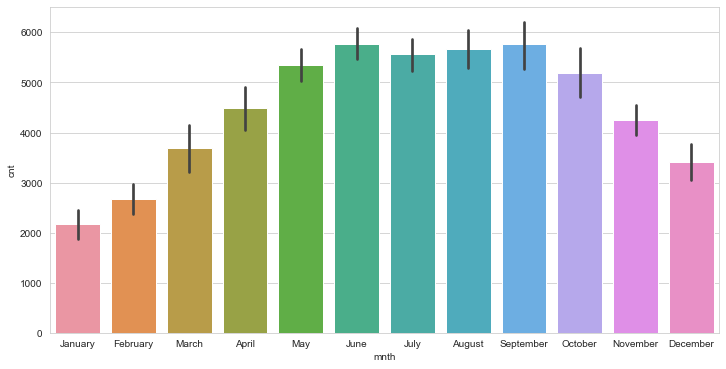

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'mnth', y = 'cnt', data = Bshar)
plt.show()

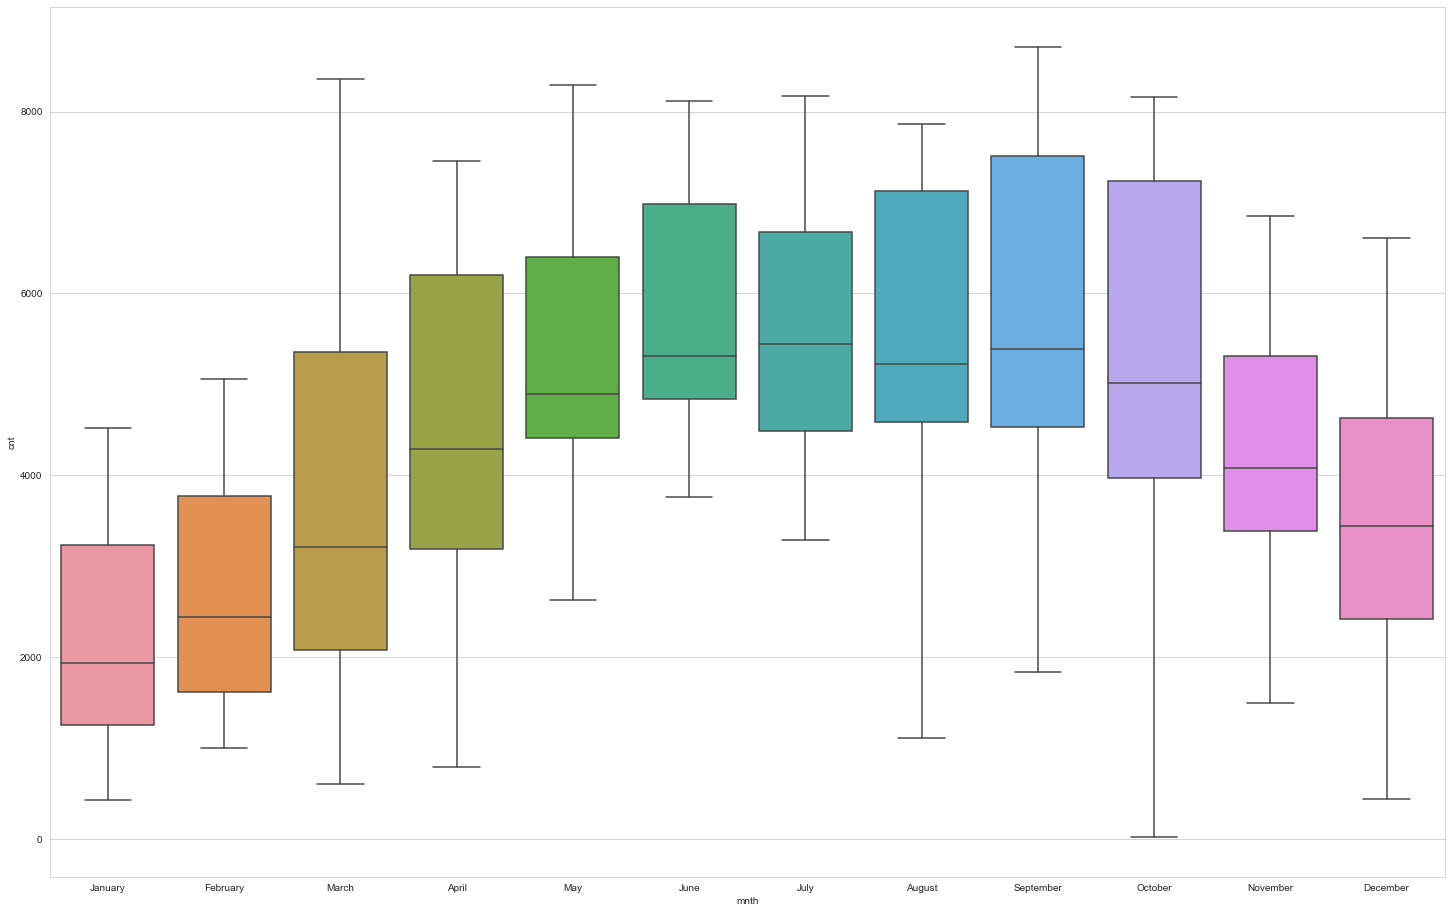

In [32]:
plt.figure(figsize=(25, 16))
sns.boxplot(x = 'mnth', y = 'cnt', data = Bshar)
plt.show()

#### The maximum no of bike per day is taken durting the september month since it has the high upper bound and lower bound value with repsect to count . Highest no of rentals taken place during the middle of the year(May- october)

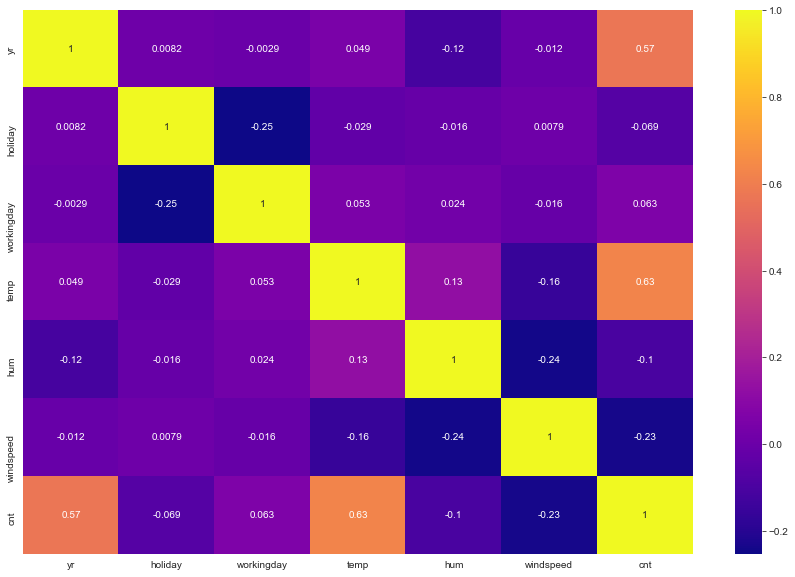

In [33]:
plt.figure(figsize = (15,10))
sns.heatmap(Bshar.corr(), annot = True, cmap = "plasma")
plt.show()

# Data Preparation
The given data must be prepared before a linear model can be built from it.
Since there are a few categorical variables with values as strings, they need to converted into numerical values with the help of dummy variables.

## Creating Dummy Variables

#### Season 

In [34]:
Bshar.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [35]:
Bshar.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [36]:
status_season = pd.get_dummies(Bshar["season"], drop_first = True)
status_season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Adding the dummy variables to the original dataset

In [37]:
Bshar=pd.concat([Bshar,status_season],axis=1)
Bshar.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,Spring,0,January,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


### Month

In [38]:
Bshar.mnth.value_counts()

May          62
December     62
January      62
October      62
July         62
March        62
August       62
November     60
April        60
September    60
June         60
February     56
Name: mnth, dtype: int64

In [39]:
status_mnth = pd.get_dummies(Bshar["mnth"], drop_first = True)
status_mnth.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### Adding the dummy variables to the original dataset

In [40]:
Bshar=pd.concat([Bshar,status_mnth],axis=1)
Bshar.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,December,February,January,July,June,March,May,November,October,September
0,Spring,0,January,0,Saturday,0,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,Spring,0,January,0,Sunday,0,Mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


### Weekday

In [41]:
Bshar.weekday.value_counts()

Monday       105
Saturday     105
Sunday       105
Tuesday      104
Friday       104
Thursday     104
Wednesday    103
Name: weekday, dtype: int64

In [42]:
status_weekday = pd.get_dummies(Bshar["weekday"], drop_first = True)
status_weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


#### Adding the dummy variables to the original dataset

In [43]:
Bshar=pd.concat([Bshar,status_weekday],axis=1)
Bshar.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,January,0,Saturday,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,Spring,0,January,0,Sunday,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


### weathersit

In [44]:
Bshar.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [45]:
status_weathersit = pd.get_dummies(Bshar["weathersit"], drop_first = True)
status_weathersit.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


#### Adding the dummy variables to the original dataset

In [46]:
Bshar=pd.concat([Bshar,status_weathersit],axis=1)
Bshar.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,Spring,0,January,0,Saturday,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,January,0,Sunday,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


 As the dummy variables have been created,Dropping the original column

In [47]:
Bshar=Bshar.drop(['season','mnth','weekday','weathersit'],axis=1)

In [48]:
Bshar.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow', 'Mist'],
      dtype='object')

In [49]:
Bshar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   Spring      730 non-null    uint8  
 8   Summer      730 non-null    uint8  
 9   Winter      730 non-null    uint8  
 10  August      730 non-null    uint8  
 11  December    730 non-null    uint8  
 12  February    730 non-null    uint8  
 13  January     730 non-null    uint8  
 14  July        730 non-null    uint8  
 15  June        730 non-null    uint8  
 16  March       730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  November    730 non-null    uint8  
 19  October     730 non-null    u

### Splitting into train and test

In [50]:
import sklearn
from sklearn.model_selection import train_test_split

In [51]:
np.random.seed(100)
Bshar_train,Bshar_test=train_test_split(Bshar,train_size=0.7,random_state=100)
print(Bshar_train.shape)
print(Bshar_test.shape)

(510, 29)
(220, 29)


## Rescaling the columns for intrepreting the variables
- All the target and independent variable should be in the comparable position so easily we can compare the co-efficient

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
num_vars=['temp','hum','windspeed','cnt']
Bshar_train[num_vars]=scaler.fit_transform(Bshar_train[num_vars])
Bshar_train[num_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.652079,0.363923,0.827658
426,0.442393,0.543728,0.351077,0.465255
728,0.245101,0.363506,0.911723,0.204096
482,0.395666,0.371673,0.259139,0.482973
111,0.345824,0.685292,0.523822,0.191095


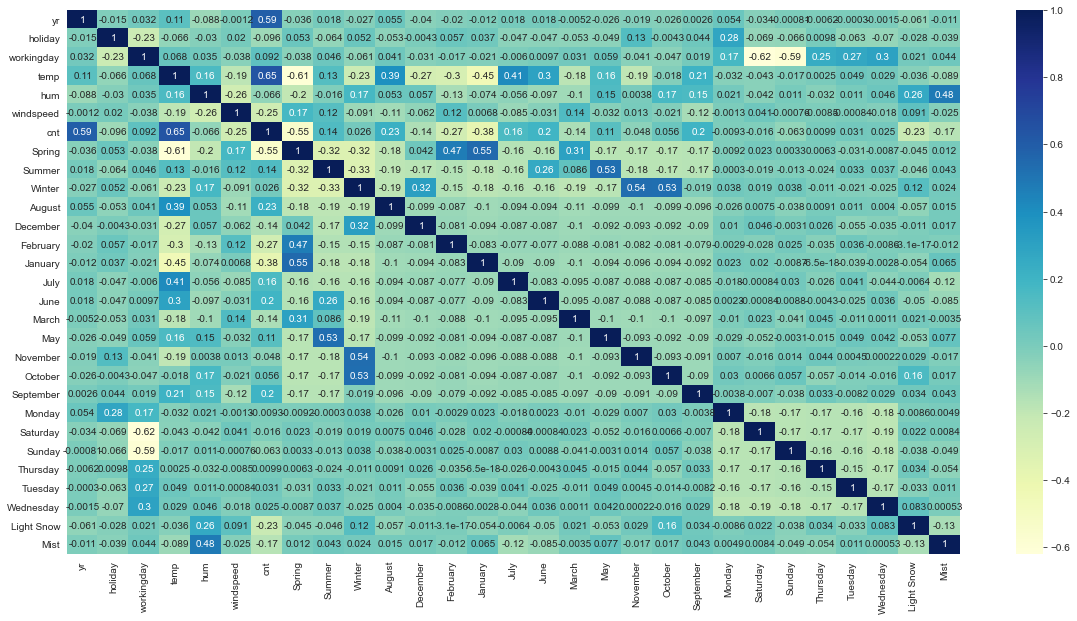

In [54]:
plt.figure(figsize = (20, 10))
sns.heatmap(Bshar_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

- The 'Cnt' is the target variable (Y_train)
- All the remaining variable are assigned to X_train

In [55]:
Y_train=Bshar_train.pop('cnt')
X_train=Bshar_train

In [56]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0,1,0.815169,0.652079,0.363923,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.543728,0.351077,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.363506,0.911723,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.371673,0.259139,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.685292,0.523822,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# RFE

RFE is used to remove the less significant variable

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

#### We will take 20 feature from RFE and start with the analysis

In [59]:
rfe = RFE(lr, 20)

In [60]:
rfe = rfe.fit(X_train, Y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('March', False, 9),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 7),
 ('September', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 5),
 ('Tuesday', False, 4),
 ('Wednesday', False, 6),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [62]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'August', 'December', 'February', 'January', 'July',
       'May', 'November', 'September', 'Saturday', 'Light Snow', 'Mist'],
      dtype='object')

#### Non-used feature for analysis

In [63]:
X_train.columns[~rfe.support_]

Index(['June', 'March', 'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

Assigning the selected 20 feauture to train set

In [64]:
X_train = X_train[col]

## Building a linear model

In [65]:
import statsmodels.api as sm

In [66]:
X_train_sm = sm.add_constant(X_train)
bs1 = sm.OLS(Y_train,X_train_sm).fit()  
bs1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.30e-188
Time:                        12:19:30   Log-Likelihood:                 525.00
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -919.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2587      0.038      6.804      0.000       0.184       0.333
yr             0.2314      0.008     28.971      0.000       0.216       0.247
holiday       -0.0484      0.027     -1.796      0.073      -0.101       0.005
workingday     0.0439      0.011      3.827      0.000       0.021       0.066
temp           0.4502      0.038     11.704      0.000       0.375       0.526
hum           -0.1252      0.031     -4.099      0.000      -0.185      -0.065
windspeed     -0.1386      0.019     -7.271      0.000      -0.176      -0.101
Spring        -0.0454      0.027     -1.704      0.089      -0.098       0.007
Summer         0.0399      0.023      1.716      0.087      -0.006       0.086
Winter         0.1088      0.023      4.794      0.000       0.064       0.153
August         0.0155      0.024      0.656      0.512      -0.031       0.062
December      -0.0481      0.018     -2.644      0.008      -0.084      -0.012
February      -0.0373      0.021     -1.741      0.082      -0.079       0.005
January       -0.0657      0.021     -3.094      0.002      -0.107      -0.024
July          -0.0400      0.025     -1.624      0.105      -0.088       0.008
May            0.0234      0.017      1.352      0.177      -0.011       0.057
November      -0.0448      0.019     -2.379      0.018      -0.082      -0.008
September      0.0812      0.021      3.784      0.000       0.039       0.123
Saturday       0.0530      0.014      3.663      0.000       0.025       0.081
Light Snow    -0.2500      0.027     -9.417      0.000      -0.302      -0.198
Mist          -0.0576      0.010     -5.511      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       81.554   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.273
Skew:                          -0.776   Prob(JB):                     4.45e-50
Kurtosis:                       5.878   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculation of VIF

Variance Influence Factor (VIF) is used to detect multicollinearity which measures the correlation and strength of correlation between the explanatory variables in a regression model. 
The VIF for the feature greater than 5 should be eliminated.


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,19.51
3,temp,18.80
6,Spring,6.68
2,workingday,5.45
7,Summer,5.39
8,Winter,5.32
5,windspeed,5.20
9,August,3.08
13,July,2.76
19,Mist,2.45


#### All these ['August','May','July','February'] columns having value of P >0.05 . Removing those variables

In [69]:
X_train = X_train.drop(['August','May','July','February'],axis=1)

## Model 2

In [70]:
X_train_sm = sm.add_constant(X_train)
bs2 = sm.OLS(Y_train,X_train_sm).fit()  
bs2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.71e-189
Time:                        12:19:30   Log-Likelihood:                 518.05
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     493   BIC:                            -930.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2350      0.034      6.863      0.000       0.168       0.302
yr             0.2314      0.008     28.779      0.000       0.216       0.247
holiday       -0.0494      0.027     -1.818      0.070      -0.103       0.004
workingday     0.0459      0.012      3.967      0.000       0.023       0.069
temp           0.4601      0.036     12.614      0.000       0.388       0.532
hum           -0.1138      0.030     -3.735      0.000      -0.174      -0.054
windspeed     -0.1381      0.019     -7.193      0.000      -0.176      -0.100
Spring        -0.0499      0.021     -2.405      0.017      -0.091      -0.009
Summer         0.0576      0.014      4.018      0.000       0.029       0.086
Winter         0.1151      0.017      6.586      0.000       0.081       0.149
December      -0.0393      0.017     -2.254      0.025      -0.074      -0.005
January       -0.0475      0.018     -2.637      0.009      -0.083      -0.012
November      -0.0392      0.019     -2.094      0.037      -0.076      -0.002
September      0.0875      0.016      5.431      0.000       0.056       0.119
Saturday       0.0549      0.015      3.766      0.000       0.026       0.084
Light Snow    -0.2552      0.027     -9.563      0.000      -0.308      -0.203
Mist          -0.0572      0.011     -5.434      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       82.778   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.251
Skew:                          -0.816   Prob(JB):                     8.13e-47
Kurtosis:                       5.707   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,18.74
3,temp,13.46
2,workingday,5.34
5,windspeed,5.04
6,Spring,3.82
8,Winter,3.58
15,Mist,2.44
7,Summer,2.36
0,yr,2.10
13,Saturday,1.99


#### The VIF value of 'HUM' is very high around 18.5 the value >5 is not used for best model, so removing the column

In [72]:
X_train = X_train.drop(['hum'],axis=1)

## Model 3

In [73]:
X_train_sm = sm.add_constant(X_train)
bs3 = sm.OLS(Y_train,X_train_sm).fit()  
bs3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.88e-187
Time:                        12:19:30   Log-Likelihood:                 510.93
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     494   BIC:                            -922.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1975      0.033      5.956      0.000       0.132       0.263
yr             0.2351      0.008     29.082      0.000       0.219       0.251
holiday       -0.0475      0.028     -1.727      0.085      -0.102       0.007
workingday     0.0486      0.012      4.158      0.000       0.026       0.072
temp           0.4229      0.036     11.898      0.000       0.353       0.493
windspeed     -0.1185      0.019     -6.335      0.000      -0.155      -0.082
Spring        -0.0602      0.021     -2.889      0.004      -0.101      -0.019
Summer         0.0495      0.014      3.450      0.001       0.021       0.078
Winter         0.1008      0.017      5.836      0.000       0.067       0.135
December      -0.0460      0.018     -2.622      0.009      -0.081      -0.012
January       -0.0531      0.018     -2.923      0.004      -0.089      -0.017
November      -0.0401      0.019     -2.117      0.035      -0.077      -0.003
September      0.0802      0.016      4.948      0.000       0.048       0.112
Saturday       0.0596      0.015      4.052      0.000       0.031       0.089
Light Snow    -0.2979      0.024    -12.198      0.000      -0.346      -0.250
Mist          -0.0805      0.009     -9.351      0.000      -0.097      -0.064
==============================================================================
Omnibus:                       82.820   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.616
Skew:                          -0.808   Prob(JB):                     5.56e-48
Kurtosis:                       5.762   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.91
2,workingday,5.34
4,windspeed,4.86
5,Spring,3.04
7,Winter,2.86
0,yr,2.08
6,Summer,2.03
12,Saturday,1.99
10,November,1.83
9,January,1.67


The 'Holiday' column have the P value of 0.085 which is not suitable , removing this column

In [75]:
X_train = X_train.drop(['holiday'],axis=1)

## Model 4

In [76]:
X_train_sm = sm.add_constant(X_train)
bs4 = sm.OLS(Y_train,X_train_sm).fit()  
bs4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.89e-188
Time:                        12:19:30   Log-Likelihood:                 509.40
No. Observations:                 510   AIC:                            -988.8
Df Residuals:                     495   BIC:                            -925.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1924      0.033      5.813      0.000       0.127       0.257
yr             0.2353      0.008     29.045      0.000       0.219       0.251
workingday     0.0556      0.011      5.056      0.000       0.034       0.077
temp           0.4216      0.036     11.841      0.000       0.352       0.492
windspeed     -0.1191      0.019     -6.351      0.000      -0.156      -0.082
Spring        -0.0618      0.021     -2.966      0.003      -0.103      -0.021
Summer         0.0491      0.014      3.412      0.001       0.021       0.077
Winter         0.1007      0.017      5.822      0.000       0.067       0.135
December      -0.0469      0.018     -2.668      0.008      -0.081      -0.012
January       -0.0539      0.018     -2.961      0.003      -0.090      -0.018
November      -0.0440      0.019     -2.333      0.020      -0.081      -0.007
September      0.0778      0.016      4.812      0.000       0.046       0.110
Saturday       0.0666      0.014      4.702      0.000       0.039       0.094
Light Snow    -0.2972      0.024    -12.148      0.000      -0.345      -0.249
Mist          -0.0802      0.009     -9.296      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       87.843   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.795
Skew:                          -0.843   Prob(JB):                     1.40e-52
Kurtosis:                       5.897   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.64
3,windspeed,4.85
1,workingday,4.74
4,Spring,2.96
6,Winter,2.85
0,yr,2.07
5,Summer,2.01
11,Saturday,1.85
9,November,1.79
8,January,1.66


- Now almost all the P value of feature is less than 0.05 but  'temp' column has the VIF >5 
- The temp column cannot be removed because it has the high co-relation with the 'Cnt', the temp column was dropped and checked there was the significant change in R2 value. so removing the 'workingday' feauture

In [78]:
X_train = X_train.drop(['workingday'],axis=1)

## Model 5

In [79]:
X_train_sm = sm.add_constant(X_train)
bs5 = sm.OLS(Y_train,X_train_sm).fit()  
bs5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.02e-183
Time:                        12:19:30   Log-Likelihood:                 496.56
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     496   BIC:                            -905.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2367      0.033      7.238      0.000       0.172       0.301
yr             0.2359      0.008     28.422      0.000       0.220       0.252
temp           0.4228      0.036     11.590      0.000       0.351       0.494
windspeed     -0.1203      0.019     -6.265      0.000      -0.158      -0.083
Spring        -0.0643      0.021     -3.013      0.003      -0.106      -0.022
Summer         0.0492      0.015      3.337      0.001       0.020       0.078
Winter         0.0971      0.018      5.481      0.000       0.062       0.132
December      -0.0452      0.018     -2.507      0.012      -0.081      -0.010
January       -0.0533      0.019     -2.859      0.004      -0.090      -0.017
November      -0.0459      0.019     -2.378      0.018      -0.084      -0.008
September      0.0778      0.017      4.697      0.000       0.045       0.110
Saturday       0.0222      0.011      1.947      0.052      -0.000       0.045
Light Snow    -0.2895      0.025    -11.572      0.000      -0.339      -0.240
Mist          -0.0771      0.009     -8.746      0.000      -0.094      -0.060
==============================================================================
Omnibus:                       88.705   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.861
Skew:                          -0.883   Prob(JB):                     1.81e-48
Kurtosis:                       5.688   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.83
1,temp,3.96
5,Winter,2.77
3,Spring,2.75
0,yr,2.07
4,Summer,1.92
8,November,1.79
7,January,1.65
12,Mist,1.56
6,December,1.47


After removing the 'Working Day' feauture all the 'VIF' value has now became less than 5. But the Saturday P value is greated than 0.05, so removing the column

In [81]:
X_train = X_train.drop(['Saturday'],axis=1)

## Model 6

In [82]:
X_train_sm = sm.add_constant(X_train)
bs6 = sm.OLS(Y_train,X_train_sm).fit()  
bs6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.54e-184
Time:                        12:19:30   Log-Likelihood:                 494.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     497   BIC:                            -908.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2404      0.033      7.342      0.000       0.176       0.305
yr             0.2354      0.008     28.298      0.000       0.219       0.252
temp           0.4217      0.037     11.529      0.000       0.350       0.494
windspeed     -0.1188      0.019     -6.172      0.000      -0.157      -0.081
Spring        -0.0648      0.021     -3.028      0.003      -0.107      -0.023
Summer         0.0487      0.015      3.299      0.001       0.020       0.078
Winter         0.0972      0.018      5.471      0.000       0.062       0.132
December      -0.0442      0.018     -2.449      0.015      -0.080      -0.009
January       -0.0528      0.019     -2.826      0.005      -0.090      -0.016
November      -0.0468      0.019     -2.417      0.016      -0.085      -0.009
September      0.0778      0.017      4.680      0.000       0.045       0.110
Light Snow    -0.2888      0.025    -11.513      0.000      -0.338      -0.239
Mist          -0.0769      0.009     -8.707      0.000      -0.094      -0.060
==============================================================================
Omnibus:                       82.418   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.557
Skew:                          -0.810   Prob(JB):                     6.98e-47
Kurtosis:                       5.716   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.81
1,temp,3.92
5,Winter,2.77
3,Spring,2.74
0,yr,2.07
4,Summer,1.92
8,November,1.79
7,January,1.65
11,Mist,1.56
6,December,1.46


Model observations:
- 12 features have been selected along with constant
- All the selected features have a very low p-value, so they are significant. 
- All the feauture has the VIF value less than 5
- The overall fit of the model is good with an F-statistic probability value of 4.54e-184.
- The model explains 83.3% variability in the training data R-squared with even an adjusted R-square value of 82.9%.

## Prediction of y_train vs y_train_pred

In [84]:
y_train_pred = bs6.predict(X_train_sm)

Text(0, 0.5, 'y__train_pred')

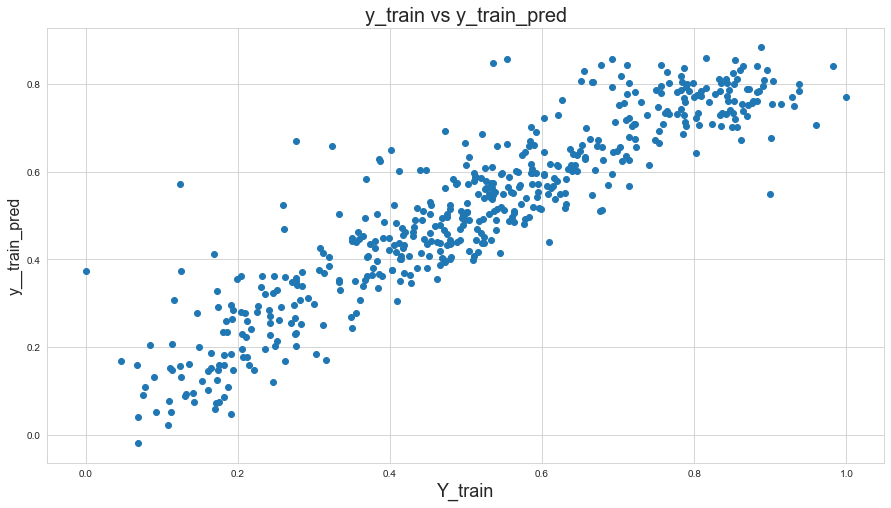

In [85]:
plt.figure(figsize=(15,8))
plt.scatter(Y_train, y_train_pred)
plt.title('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('Y_train', fontsize = 18)                         
plt.ylabel('y__train_pred', fontsize = 16) 

From the above plot it is evident that the spread is almost linear.

## Residual analysis

To check if the error terms are also normally distributed, plotting the histogram with the error terms.

In [86]:
res = Y_train - y_train_pred

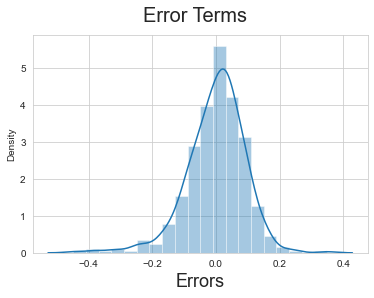

In [87]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        
plt.show()

From the plot, the error terms are normally distributed with mean=0

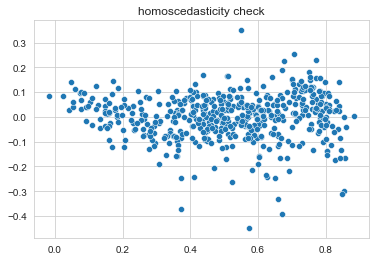

In [88]:
# Residuals vs fitted values plot for homoscedasticity check
p = sns.scatterplot(y_train_pred,res)
p = plt.title('homoscedasticity check')

The variance of the error terms is constant across the values of the dependent variable.

In [89]:
residuals = Y_train.values-y_train_pred
mean_residuals = np.mean(residuals)
print(mean_residuals)

-3.4124663878956467e-15


#### The Residual mean is also calculated and it is almost zero

## Making predictions on Test set using Final Model

- All the transformation need to be done on the test set as same as the training set before starting the predictions 

#### Scalar transform on test set

In [90]:
#num_vars=['temp','hum','windspeed','cnt']
Bshar_test[num_vars]=scaler.transform(Bshar_test[num_vars])
Bshar_test[num_vars].head()

,temp,hum,windspeed,cnt
184,0.831783,0.565508,0.115794,0.692706
535,0.901354,0.505614,0.211364,0.712034
299,0.511964,0.794188,0.459509,0.303382
221,0.881625,0.286191,0.466884,0.547400
152,0.817246,0.130470,0.738905,0.569029


Assigning the target variable to Y_test and remaining variables on X_test

In [91]:
Y_test = Bshar_test.pop('cnt')
X_test = Bshar_test

In [92]:
X_test.shape

(220, 28)

### The feature used in Final model

In [93]:
X_train_sm.columns

Index(['const', 'yr', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter',
       'December', 'January', 'November', 'September', 'Light Snow', 'Mist'],
      dtype='object')

## Adding the constant along with only the feature that are used in final model

In [94]:
X_test_sm = X_test[['yr', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter',
       'December', 'January', 'November', 'September', 'Light Snow', 'Mist' ]]
X_test_sm = sm.add_constant(X_test_sm)

In [95]:
X_test_sm.head()

,const,yr,temp,windspeed,Spring,Summer,Winter,December,January,November,September,Light Snow,Mist
184,1.0,0,0.831783,0.115794,0,0,0,0,0,0,0,0,1
535,1.0,1,0.901354,0.211364,0,1,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.459509,0,0,1,0,0,0,0,0,1
221,1.0,0,0.881625,0.466884,0,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.738905,0,1,0,0,0,0,0,0,0


## Predicting the Y_test with the final model (bs6)

In [96]:
y_test_pred = bs6.predict(X_test_sm)
y_test_pred.head()

184    0.500439
535    0.879488
299    0.421913
221    0.556711
152    0.545982
dtype: float64

Text(0, 0.5, 'y_pred')

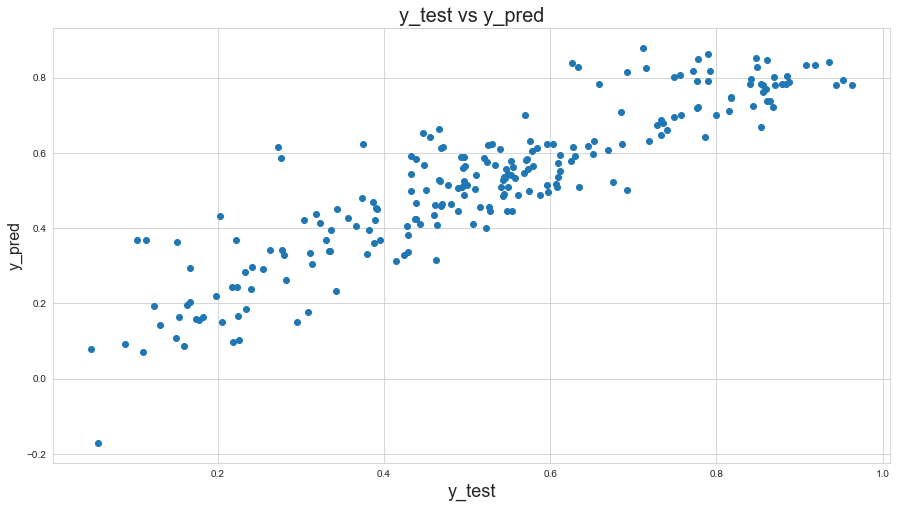

In [97]:
plt.figure(figsize=(15,8))
plt.scatter(Y_test, y_test_pred)
plt.title('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

The spread for test dataset is similar to that of train dataset.

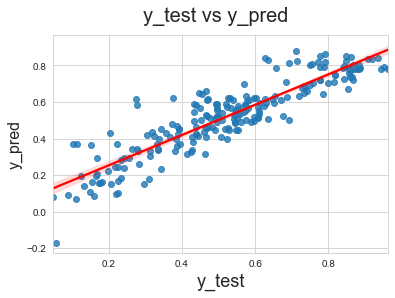

In [98]:
fig = plt.figure()
sns.regplot(Y_test,y_test_pred,line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                       
plt.show()

We can see best fitted line in above plot

#### Calculating the r-Squared value for test and train

In [99]:
from sklearn.metrics import r2_score

## Test

In [100]:
r2_test=r2_score(y_true=Y_test, y_pred=y_test_pred).round(3)
r2_test

0.81

In [101]:
Adj_r2=1-(1-0.81)*(13-1)/(13-1-1)
print(Adj_r2)

0.7927272727272727


## Train

In [102]:
r2_train = r2_score(y_true = Y_train, y_pred = y_train_pred).round(3)
r2_train

0.833

In [103]:
Adj_r2=1-(1-0.833)*(13-1)/(13-1-1)
print(Adj_r2)

0.8178181818181818


### Comparision of r2 score 
#### Training dataset:
- r2 is 0.833
- adjusted r2 is 0.817

#### Testing data predictions:
- r2 is 0.81
- adjusted r2 is 0.792

## Final Model 

In [104]:
bs6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.54e-184
Time:                        12:19:32   Log-Likelihood:                 494.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     497   BIC:                            -908.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2404      0.033      7.342      0.000       0.176       0.305
yr             0.2354      0.008     28.298      0.000       0.219       0.252
temp           0.4217      0.037     11.529      0.000       0.350       0.494
windspeed     -0.1188      0.019     -6.172      0.000      -0.157      -0.081
Spring        -0.0648      0.021     -3.028      0.003      -0.107      -0.023
Summer         0.0487      0.015      3.299      0.001       0.020       0.078
Winter         0.0972      0.018      5.471      0.000       0.062       0.132
December      -0.0442      0.018     -2.449      0.015      -0.080      -0.009
January       -0.0528      0.019     -2.826      0.005      -0.090      -0.016
November      -0.0468      0.019     -2.417      0.016      -0.085      -0.009
September      0.0778      0.017      4.680      0.000       0.045       0.110
Light Snow    -0.2888      0.025    -11.513      0.000      -0.338      -0.239
Mist          -0.0769      0.009     -8.707      0.000      -0.094      -0.060
==============================================================================
Omnibus:                       82.418   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.557
Skew:                          -0.810   Prob(JB):                     6.98e-47
Kurtosis:                       5.716   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
bs6.params.round(3)

const         0.240
yr            0.235
temp          0.422
windspeed    -0.119
Spring       -0.065
Summer        0.049
Winter        0.097
December     -0.044
January      -0.053
November     -0.047
September     0.078
Light Snow   -0.289
Mist         -0.077
dtype: float64

### The equation is:  
#### Cnt = 0.240 Const + 0.235 (yr- 2019) + 0.422 (temp) -0.119(windspeed) -0.065 (Spring) + 0.049 (Summer) + 0.097(Winter)         -0.044(December) -0.053(January)  -0.047(November) + 0.078(September)  -0.289(Light Snow) - 0.077 (Mist)

## Final Observation:

- The Value of the coefficient of each independent variable indicates the value of the effect of that variable on dependent variable, and the sign on the coefficient (positive or negative) indicates the direction(direct/reverse) of the effect.

- The coefficient of each independent variable depicts the change in 'cnt' (dependant variable) relative to a one unit change in that particular independent variable, holding all other independent variables constant

#### Demand seems to be increase vastly with the 'temp'
#### Also the demand seems to be increase in 'Yr' in the 'summer' & 'Winter' season
#### The demand increases in the month of 'September' 
#### Demand has decrease with the 'windspeed', 'Spring' , 'Mist & Light Snow weather situation
#### Demand was very less during the end and starting of the next year ( November,December, January)
